In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bangDF = pd.read_csv("../dataset/Bengaluru_House_Data.csv")

In [4]:
bangDF

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
bangDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
bangDF.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
bangDF.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
bangDF.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df2 = bangDF.drop(["area_type","availability","society"], axis="columns")

In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
df3 = df2.dropna(subset = ["location", "size", "bath"])

In [13]:
df3.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '2 BHK'),
  Text(1, 0, '3 BHK'),
  Text(2, 0, '4 Bedroom'),
  Text(3, 0, '4 BHK'),
  Text(4, 0, '3 Bedroom'),
  Text(5, 0, '1 BHK'),
  Text(6, 0, '2 Bedroom'),
  Text(7, 0, '5 Bedroom'),
  Text(8, 0, '6 Bedroom'),
  Text(9, 0, '1 Bedroom'),
  Text(10, 0, '8 Bedroom'),
  Text(11, 0, '7 Bedroom'),
  Text(12, 0, '5 BHK'),
  Text(13, 0, '9 Bedroom'),
  Text(14, 0, '6 BHK'),
  Text(15, 0, '7 BHK'),
  Text(16, 0, '1 RK'),
  Text(17, 0, '10 Bedroom'),
  Text(18, 0, '9 BHK'),
  Text(19, 0, '8 BHK'),
  Text(20, 0, '11 BHK'),
  Text(21, 0, '10 BHK'),
  Text(22, 0, '11 Bedroom'),
  Text(23, 0, '27 BHK'),
  Text(24, 0, '19 BHK'),
  Text(25, 0, '43 Bedroom'),
  Text(26, 0, '16 BHK'),
  Text(27, 0, '14 BHK'),
  Text(28, 0, '12 Bedroom'),
  Text(29, 0, '13 BHK'),
  Text(30, 0, '18 Bedroom')])

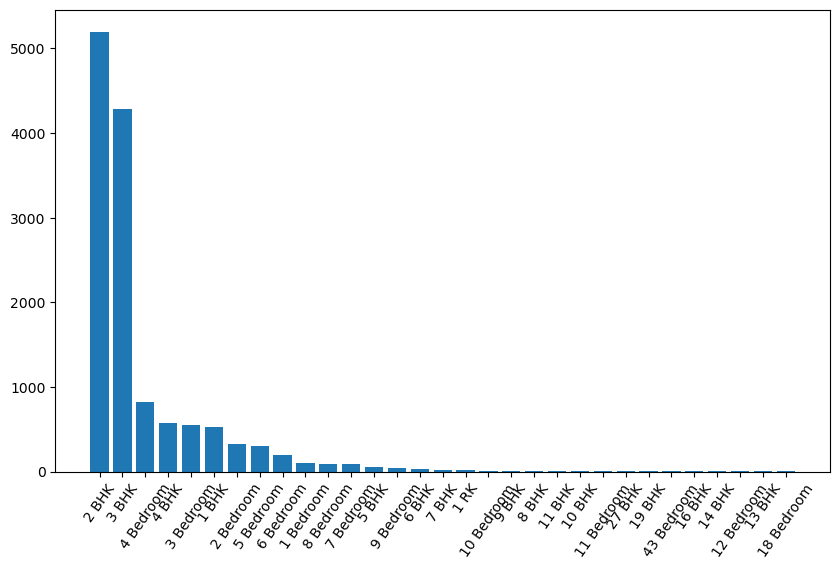

In [15]:
size_count = df3['size'].value_counts()
plt.figure(figsize = (10,6))


plt.bar(size_count.index, size_count.values)
plt.xticks(rotation=55)

In [16]:
df3[df3['size'] == '1 RK'].shape[0]

13

In [17]:
df3.shape

(13246, 6)

In [18]:
df4 = df3[df3['size'] != '1 RK']

In [19]:
df4.shape

(13233, 6)

In [20]:
df4['bhk'] = df4['size'].apply(lambda x: x.split(' ')[0])

C:\Users\RAUNAKSINGH KHALSA\AppData\Local\Temp\ipykernel_22992\2715090952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bhk'] = df4['size'].apply(lambda x: x.split(' ')[0])


In [21]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [22]:
df5 = df4.drop(columns =["size"])

In [23]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [24]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13233 non-null  object 
 1   total_sqft  13233 non-null  object 
 2   bath        13233 non-null  float64
 3   balcony     12697 non-null  float64
 4   price       13233 non-null  float64
 5   bhk         13233 non-null  object 
dtypes: float64(3), object(3)
memory usage: 723.7+ KB


In [25]:
df5['bhk'] = df5['bhk'].astype(int)

In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13233 non-null  object 
 1   total_sqft  13233 non-null  object 
 2   bath        13233 non-null  float64
 3   balcony     12697 non-null  float64
 4   price       13233 non-null  float64
 5   bhk         13233 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 723.7+ KB


In [27]:
df5.isnull().sum()

location        0
total_sqft      0
bath            0
balcony       536
price           0
bhk             0
dtype: int64

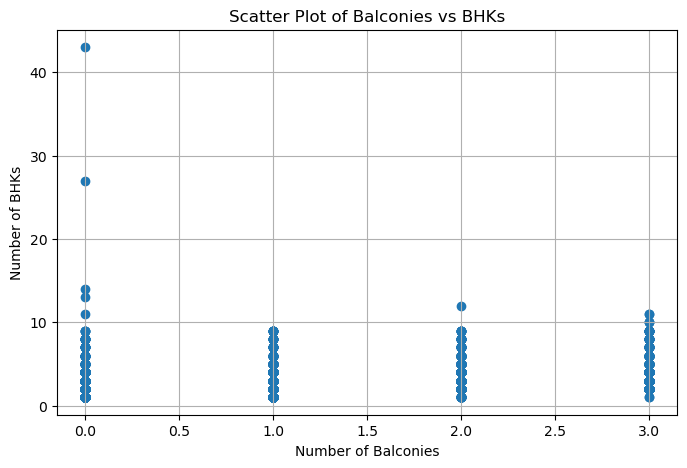

In [28]:

plt.figure(figsize=(8,5))
plt.scatter(df5['balcony'], df5['bhk'])
plt.xlabel("Number of Balconies")
plt.ylabel("Number of BHKs")
plt.title("Scatter Plot of Balconies vs BHKs")
plt.grid(True)  # Adds grid lines for better readability
plt.show()

In [29]:
df5.groupby('bhk')['balcony'].agg(["mean","median", "count"])

,mean,median,count
bhk,,,
1,0.779528,1.0,635
2,1.431204,1.0,5480
3,1.823416,2.0,4655
4,1.697092,2.0,1238
5,1.638796,2.0,299
6,1.812500,2.0,192
7,1.976471,2.0,85
8,1.705882,2.0,68
9,1.911765,2.0,34


In [30]:
df5['balcony'].fillna(df5['balcony'].median(), inplace=True)

C:\Users\RAUNAKSINGH KHALSA\AppData\Local\Temp\ipykernel_22992\1453688002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5['balcony'].fillna(df5['balcony'].median(), inplace=True)


In [31]:
df5.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [32]:
df5.describe()

,bath,balcony,price,bhk
count,13233.000000,13233.000000,13233.000000,13233.000000
mean,2.694249,1.602282,112.472175,2.803673
std,1.341115,0.804208,149.125993,1.295162
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [33]:
df5.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'bhk'], dtype='object')

In [34]:
df5.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2063,), dtype=object)

In [35]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [36]:
df5[~df5['total_sqft'].apply(isfloat)].head(50)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [37]:
def convertRangeToFloat(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [38]:
df5.shape

(13233, 6)

In [39]:
df6 =df5.copy()
df6['total_sqft']  = df6['total_sqft'].apply(convertRangeToFloat)

In [40]:
df6.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [41]:
df7 = df6.dropna(subset=['total_sqft'])

In [42]:
df7.shape

(13187, 6)

In [43]:
df7.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [44]:
df8= df7.copy()
df8['price_per_sq_ft'] = df8['price']*100000/ df8['total_sqft']

In [45]:
df8.head(50)

,location,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
0,Electronic City Phase II,1056.00,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.00,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.00,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.00,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.00,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.00,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.00,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.00,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,1310.00,3.0,1.0,63.25,3,4828.244275
9,Gandhi Bazar,1020.00,6.0,2.0,370.00,6,36274.509804


In [62]:
len(df8.location.unique())

1287

In [56]:
df8.location = df8.location.apply(lambda x: x.strip())
location_stats = df8.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats


location
Whitefield                                        532
Sarjapur  Road                                    392
Electronic City                                   302
Kanakpura Road                                    264
Thanisandra                                       232
                                                 ... 
4th Block HBR Layout                                1
5th block Koramangala                               1
6th Block Jayanagar                                 1
6th Block Rajaji Nagar                              1
6th block banashankari 3rd stage, 100 feet ORR      1
Name: location, Length: 1287, dtype: int64

In [58]:
len(location_stats[location_stats <= 10])

1047

In [59]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [61]:
len(df8.location.unique())

1287

In [64]:
df8.location = df8.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [66]:
len(df8.location.unique())

241

In [68]:
df8.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,2.0,370.00,6,36274.509804


In [73]:
df8[(df8['total_sqft']/df8['bhk']) < 300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
9,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,2.0,218.0,7,15571.428571
13279,other,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [75]:
df9 = df8[~((df8['total_sqft']/df8['bhk']) < 300)]

In [80]:
df9.shape

(12444, 7)

In [141]:
df9['price_per_sq_ft'].describe()

count     12444.000000
mean       6309.294348
std        4169.956605
min         267.829813
25%        4210.280144
50%        5294.117647
75%        6917.657750
max      176470.588235
Name: price_per_sq_ft, dtype: float64

In [142]:
%matplotlib inline

Text(0.5, 1.0, 'Box Plot of Price Per Square Foot')

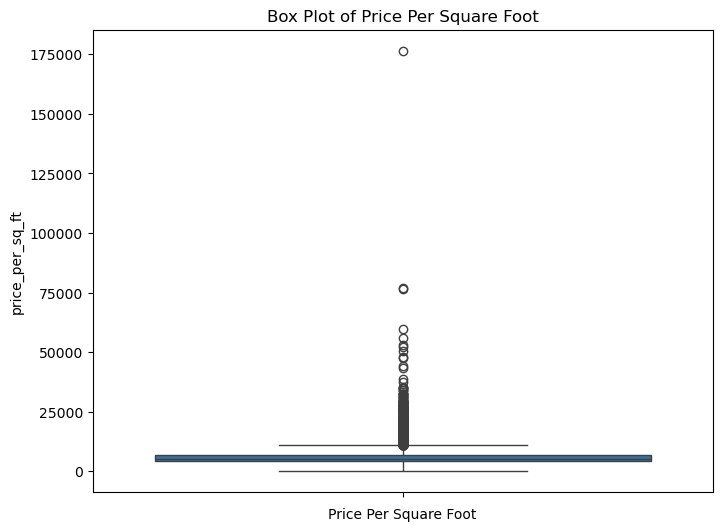

In [143]:
plt.figure(figsize = (8,6))
sns.boxplot(y = df9['price_per_sq_ft'])
plt.xlabel('Price Per Square Foot')
plt.title('Box Plot of Price Per Square Foot')

In [144]:
(len(df9[df9['price_per_sq_ft']>(Q3 + 1.5 * IQR)])/ len(df9['price_per_sq_ft']))*100

8.052073288331727

In [259]:
def remove_outliers_per_location(df,column,l_multiplier,u_multiplier):
    df_out = pd.DataFrame()

    for location, sub_df in df.groupby('location'):
        Q1 = sub_df[column].quantile(0.25)
        Q3 = sub_df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - (l_multiplier*IQR)
        upper_bound = Q3 + (u_multiplier*IQR)
        filtered_subdf = sub_df[(sub_df[column] >= lower_bound) & (sub_df[column] <= upper_bound)]
        df_out = pd.concat([df_out, filtered_subdf], ignore_index=True)
    

    return df_out

In [284]:
df10 = remove_outliers_per_location(df9,'price_per_sq_ft',l_multiplier=1.5, u_multiplier= 1.5)

In [285]:
df10.shape

(11569, 7)

Text(0.5, 1.0, 'Box Plot of Price Per Square Foot')

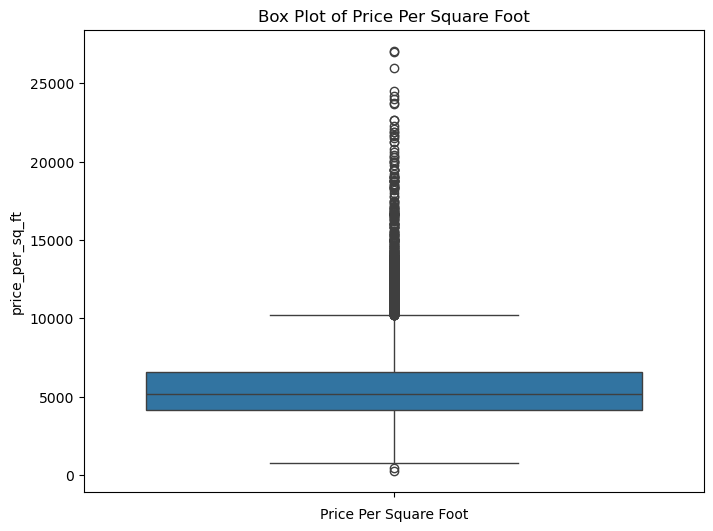

In [286]:
plt.figure(figsize = (8,6))
sns.boxplot(y = df10['price_per_sq_ft'])
plt.xlabel('Price Per Square Foot')
plt.title('Box Plot of Price Per Square Foot')

In [287]:
df10.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
count,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000,11569.000000
mean,1531.833279,2.494857,1.602559,93.899056,2.591408,5732.378700
std,1108.250918,1.005429,0.789835,95.295522,0.920959,2505.646521
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1106.000000,2.000000,1.000000,48.000000,2.000000,4166.666667
50%,1287.000000,2.000000,2.000000,67.000000,2.000000,5168.539326
75%,1654.000000,3.000000,2.000000,103.000000,3.000000,6577.380952
max,52272.000000,16.000000,3.000000,2200.000000,16.000000,27083.333333


In [288]:
import matplotlib
def plot_scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,9)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sq_ft, color = 'blue', label = 'bhk 2', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sq_ft, color = 'green', marker = '+', label = 'bhk 3', s=50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price per Square Feet Area')
    plt.legend()
    plt.title(location)

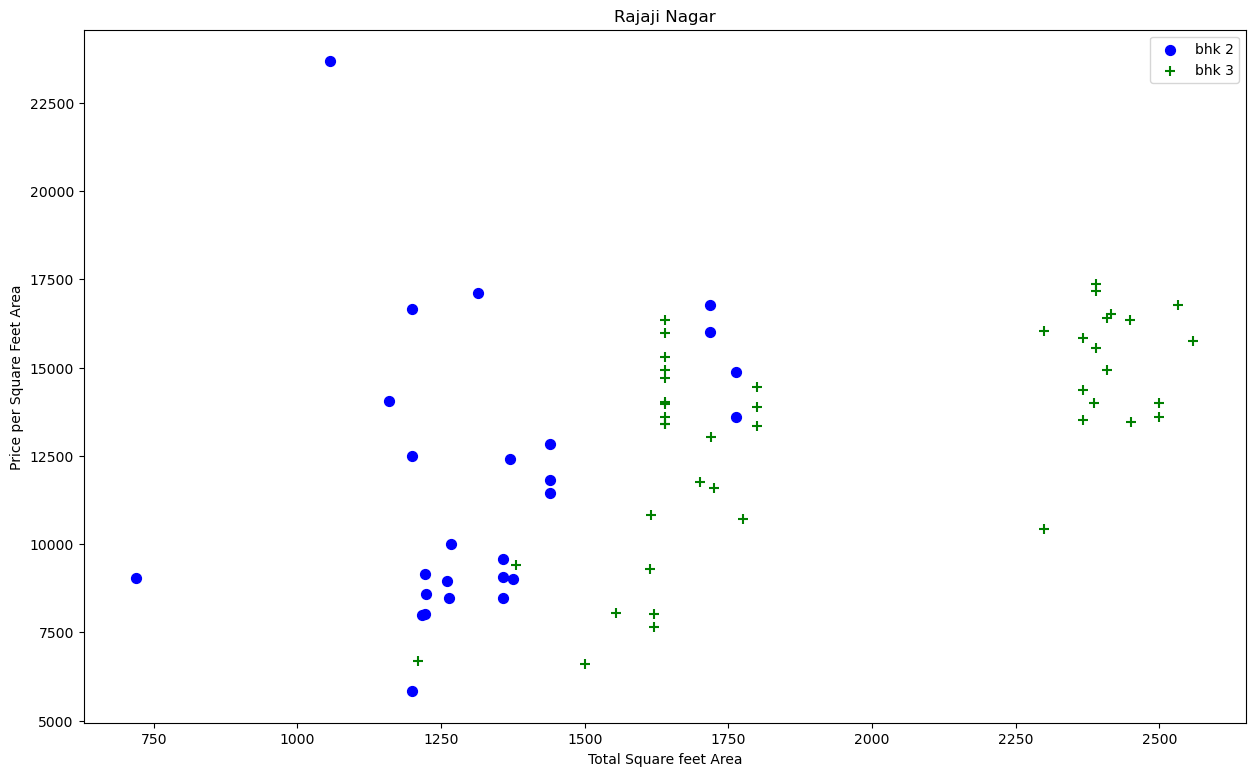

In [289]:
plot_scatter_plot(df10, 'Rajaji Nagar')